## Second Order Fermi Acceleration

The SecondOrderFermi module implements scattering with scatter centers moving in random directions. Here, we investigate the scattering process at a fixed energy. 



In [13]:
import crpropa

import numpy as np
import pylab as plt

beta = 0.1

acceleration = crpropa.SecondOrderFermi(beta*crpropa.c_light, 10.*crpropa.parsec)

N = 100000
E0 = 1*crpropa.PeV
angle_to_particle = np.zeros(N)
energy_gain = np.zeros(N)

scatter_velocity_x = np.zeros(N)
scatter_velocity_y = np.zeros(N)
scatter_velocity_z = np.zeros(N)

for i in range(N):

    c = crpropa.Candidate()
    c.current.setDirection(crpropa.Vector3d(0,0,1.))
    c.current.setEnergy(E0)

    vs = acceleration.scatterCenterVelocity(c)
    scatter_velocity_x[i] = vs.x
    scatter_velocity_y[i] = vs.y
    scatter_velocity_z[i] = vs.z
    
    alpha = vs.getAngleTo(c.current.getDirection())
    angle_to_particle[i] = alpha

    acceleration.scatter(c, vs)
    energy_gain[i] = c.current.getEnergy() / E0

The angle between the particles is returned in the rest frame of the candidate. As the candidate moves in Z direction here, the probability to see a particle perpendicular to that direction is smaller than parallel to this direction. Head on collisions, i.e. negative Z here, are more likely than tail on collisions:

Text(0.5,0,'$\\alpha$ [deg]')

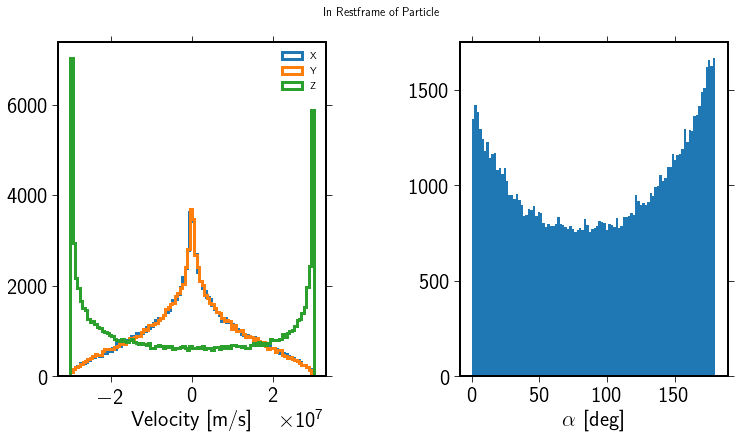

In [42]:
%matplotlib inline
fig = plt.figure(figsize=(12, 6))
fig.suptitle('In Restframe of Particle')
splt1 = fig.add_subplot(121)
splt1.hist(scatter_velocity_x, bins=100, label='X', histtype='step')
splt1.hist(scatter_velocity_y, bins=100, label='Y', histtype='step')
splt1.hist(scatter_velocity_z, bins=100, label='Z', histtype='step')
splt1.set_xlabel('Velocity [m/s]')
plt.legend()

splt2 = fig.add_subplot(122)
splt2.hist(angle_to_particle / crpropa.deg, bins=100)
splt2.set_xlabel('$\\alpha$ [deg]')


The resulting distribution of energy gains/losses is

Text(0,0.5,'Relative Energy Gain per Collision')

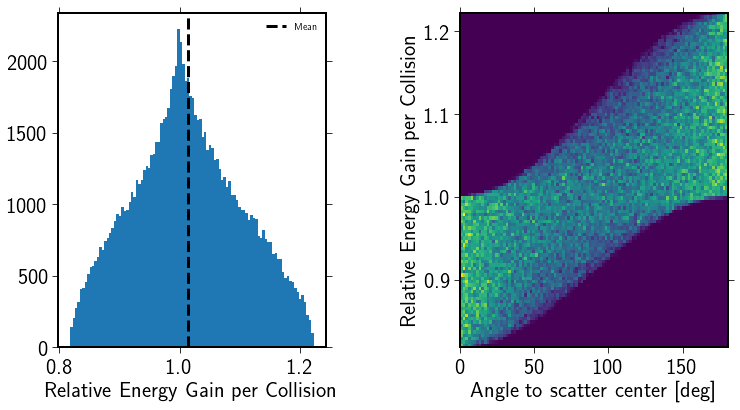

In [45]:
fig = plt.figure(figsize=(12, 6))
splt1 = fig.add_subplot(121)
splt1.hist(energy_gain, bins=100)
splt1.set_xlabel('Relative Energy Gain per Collision')
splt1.axvline(np.mean(energy_gain), ls='--', color='k', label='Mean')
plt.legend()

splt1 = fig.add_subplot(122)
splt1.hist2d(angle_to_particle / crpropa.deg, energy_gain, bins=100)
splt1.set_xlabel('Angle to Scatter Center [deg]')
splt1.set_ylabel('Relative Energy Gain per Collision')

In [ ]:
The mean average energy gain depends, a expected, on $\beta^2$

In [66]:

betas = np.array([0.01, 0.1, 0.2, 0.3, 0.4, .5, .6, .7, .8, .9])
mean_gains = np.zeros_like(betas)
std_gains = np.zeros_like(betas)

N = 10000


for j, beta in enumerate(betas):

    acceleration = crpropa.SecondOrderFermi(beta*crpropa.c_light, 10.*crpropa.parsec)

    E0 = 1*crpropa.PeV
    angle_to_particle = np.zeros(N)
    energy_gain = np.zeros(N)

    for i in range(N):

        c = crpropa.Candidate()
        c.current.setDirection(crpropa.Vector3d(0,0,1.))
        c.current.setEnergy(E0)

        vs = acceleration.scatterCenterVelocity(c)
    
        alpha = vs.getAngleTo(c.current.getDirection())
        
        acceleration.scatter(c, vs)
        energy_gain[i] = c.current.getEnergy() / E0
    
    mean_gains[j] = np.mean(energy_gain)
    std_gains[j] = np.std(energy_gain)

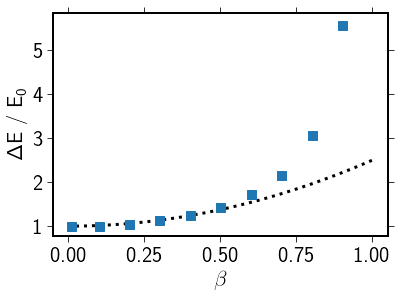

In [79]:
fig = plt.figure()
splt = fig.add_subplot(111)
b = np.linspace(0, 1.0)
splt.plot(b, 1+1.5*b**2, c='k', ls=':', label='Expected')
splt.errorbar(betas, mean_gains, yerr=std_gains / np.sqrt(N), ls='None', marker='s', label='Simulation')
splt.set_xlabel('$\\beta$')
splt.set_ylabel('$\\Delta$E / E$_0$ ')
splt.set_yticks([1, 2, 3, 4, 5])

Note that for $\beta \gtrsim 0.5$ the simualtion deviates from the expected behavior and overestimates the energy gain. The reason is that we assume the particle to be massless and propagating with c. For fast scatter centers, this is no longer the case resulting in too high energy gains.